In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Pharmaceutical Drug Spending by countries.csv')
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


In [4]:
df.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,1996.809846,16.406307,1.170948,295.046989,11765.423118
std,12.498330,6.389064,0.465635,209.152134,34878.286123
min,1970.000000,5.545000,0.207000,3.160000,6.290000
25%,1987.000000,11.516250,0.768250,111.098500,728.180000
50%,1999.000000,14.967500,1.141500,266.332000,2349.570000
75%,2007.000000,20.590500,1.523250,446.109500,7778.180000
max,2016.000000,40.239000,2.797000,1162.399000,373009.910000


In [5]:
# checking for and removing duplicates

df = df.drop_duplicates()
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16


In [6]:
# dropping FLAG_CODES column as it's not relevant to our analysis

df = df.drop(columns="FLAG_CODES")
df


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,462.11
1,AUS,1972,15.091,0.686,36.056,475.11
2,AUS,1973,15.117,0.681,39.871,533.47
3,AUS,1974,14.771,0.755,47.559,652.65
4,AUS,1975,11.849,0.682,47.561,660.76
...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,300935.91
1032,USA,2012,11.459,1.874,964.237,302768.85
1033,USA,2013,11.384,1.858,980.864,310154.01
1034,USA,2014,11.968,1.981,1081.402,344495.16


In [7]:
# checking for missing data

df.isnull().sum()

LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64

In [8]:
df.nunique()

LOCATION         36
TIME             47
PC_HEALTHXP    1009
PC_GDP          756
USD_CAP        1033
TOTAL_SPEND    1036
dtype: int64

The dataset contains 1036 data points. No duplicates were detected and after dropping the "FLAG_CODES" column, no missing data was detected. 

There are 36 unique locations over 47 years.

In [9]:
# showing correlation between all numbers (closer to 1.00 means more correlated)
df.corr(numeric_only=True)

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
TIME,1.000000,0.253944,0.610949,0.836909,0.234558
PC_HEALTHXP,0.253944,1.000000,0.721541,0.140570,0.002035
PC_GDP,0.610949,0.721541,1.000000,0.673536,0.333780
USD_CAP,0.836909,0.140570,0.673536,1.000000,0.494501
TOTAL_SPEND,0.234558,0.002035,0.333780,0.494501,1.000000


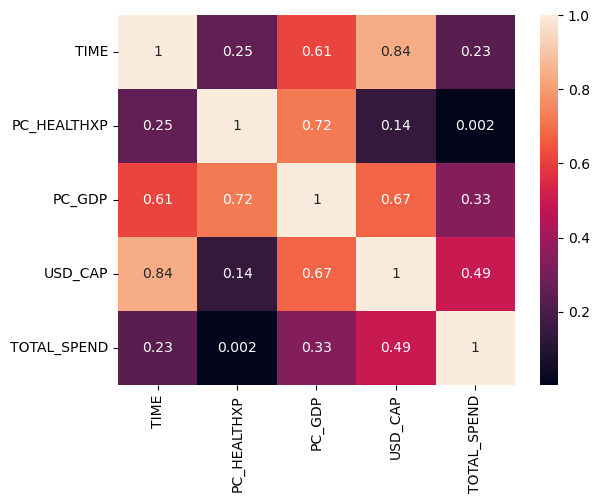

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

The following show a correlation:

USD_CAP vs TIME (0.84) <br>
PC_HEALTHXP vs PC_GDP (0.72) <br>
PC_GDP vs USD_CAP (0.67) <br>
PC_GDP vs TIME (0.61)

In [11]:
df_group = df.groupby('LOCATION').mean()
df_group

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
LOCATION,,,,,
AUS,1992.500000,12.831841,0.895705,238.668023,4785.500227
AUT,2002.500000,11.939423,1.122769,386.203692,3181.662308
BEL,1991.585366,17.843634,1.272220,292.560878,3081.228537
CAN,1992.000000,13.509089,1.146978,313.337778,9892.395333
CHE,2000.000000,11.197903,1.060968,439.933710,3322.745806
CZE,2002.500000,23.390885,1.402231,291.351154,3018.816538
DEU,1992.533333,14.511222,1.310756,325.923333,26403.744222
DNK,1997.500000,7.971000,0.693000,198.228444,1071.359167
ESP,1998.125000,20.006187,1.388594,313.030875,13627.292187


In [ ]:
# top 10 countries 
print(df_group.sort_values(by='PC_HEALTHXP', ascending=False).head(10))
print(df_group.sort_values(by='PC_GDP', ascending=False).head(10))
print(df_group.sort_values(by='USD_CAP', ascending=False).head(10))
print(df_group.sort_values(by='TOTAL_SPEND', ascending=False).head(10))

                 TIME  PC_HEALTHXP    PC_GDP     USD_CAP   TOTAL_SPEND
LOCATION                                                              
SVK       2007.000000    31.435706  2.067412  419.662529   2263.076471
HUN       2003.545455    30.323045  2.196136  368.855227   3708.208636
MEX       2007.000000    28.895294  1.667176  232.196000  26582.543529
LTU       2009.500000    28.749500  1.782167  373.835583   1154.995000
POL       2008.500000    25.804071  1.581714  291.810714  11117.389286
LVA       2009.500000    24.921667  1.435083  271.342500    569.157500
CZE       2002.500000    23.390885  1.402231  291.351154   3018.816538
KOR       1993.000000    23.182596  0.969574  181.512872   8805.893191
RUS       2015.000000    22.939000  1.286000  309.900000  44655.620000
PRT       1995.256410    21.840462  1.521615  265.263974   2740.545385
                 TIME  PC_HEALTHXP    PC_GDP     USD_CAP    TOTAL_SPEND
LOCATION                                                               
HUN 

Top 10 countries based on PC_HEALTHXP: <br>
SVK, HUN, MEX, LTU, POL, LVA, CZE, KOR, RUS, PRT

Top 10 countries based on PC_GDP: <br>
HUN, SVK, USA, LTU, GRC, MEX, SVN, POL, FRA, ITA

Top 10 countries based on USD_CAP: <br>
USA, LUX, ITA, SVN, CHE, FRA, SVK, JPN, AUT, GRC

Top 10 countries based on TOTAL_SPEND: <br>
USA, JPN, RUS, FRA, MEX, DEU, ITA, ESP, POL, CAN

In [ ]:
# bottom 10 countries
print(df_group.sort_values(by='PC_HEALTHXP', ascending=True).head(10))
print(df_group.sort_values(by='PC_GDP', ascending=True).head(10))
print(df_group.sort_values(by='USD_CAP', ascending=True).head(10))
print(df_group.sort_values(by='TOTAL_SPEND', ascending=True).head(10))

Bottom 10 countries based on PC_HEALTHXP: <br>
DNK, NOR, NLD, LUX, SWE, CHE, AUT, USA, AUS, NZL

Bottom 10 countries based on PC_GDP: <br>
TUR, NOR, LUX, DNK, NLD, GBR, SWE, NZL, AUS, FIN

Bottom 10 countries based on USD_CAP: <br>
TUR, GBR, NZL, KOR, DNK, NOR, NLD, FIN, SWE, EST

Bottom 10 countries based on TOTAL_SPEND: <br>
ISL, LUX, EST, NZL, LVA, SVN, NOR, DNK, FIN, IRL

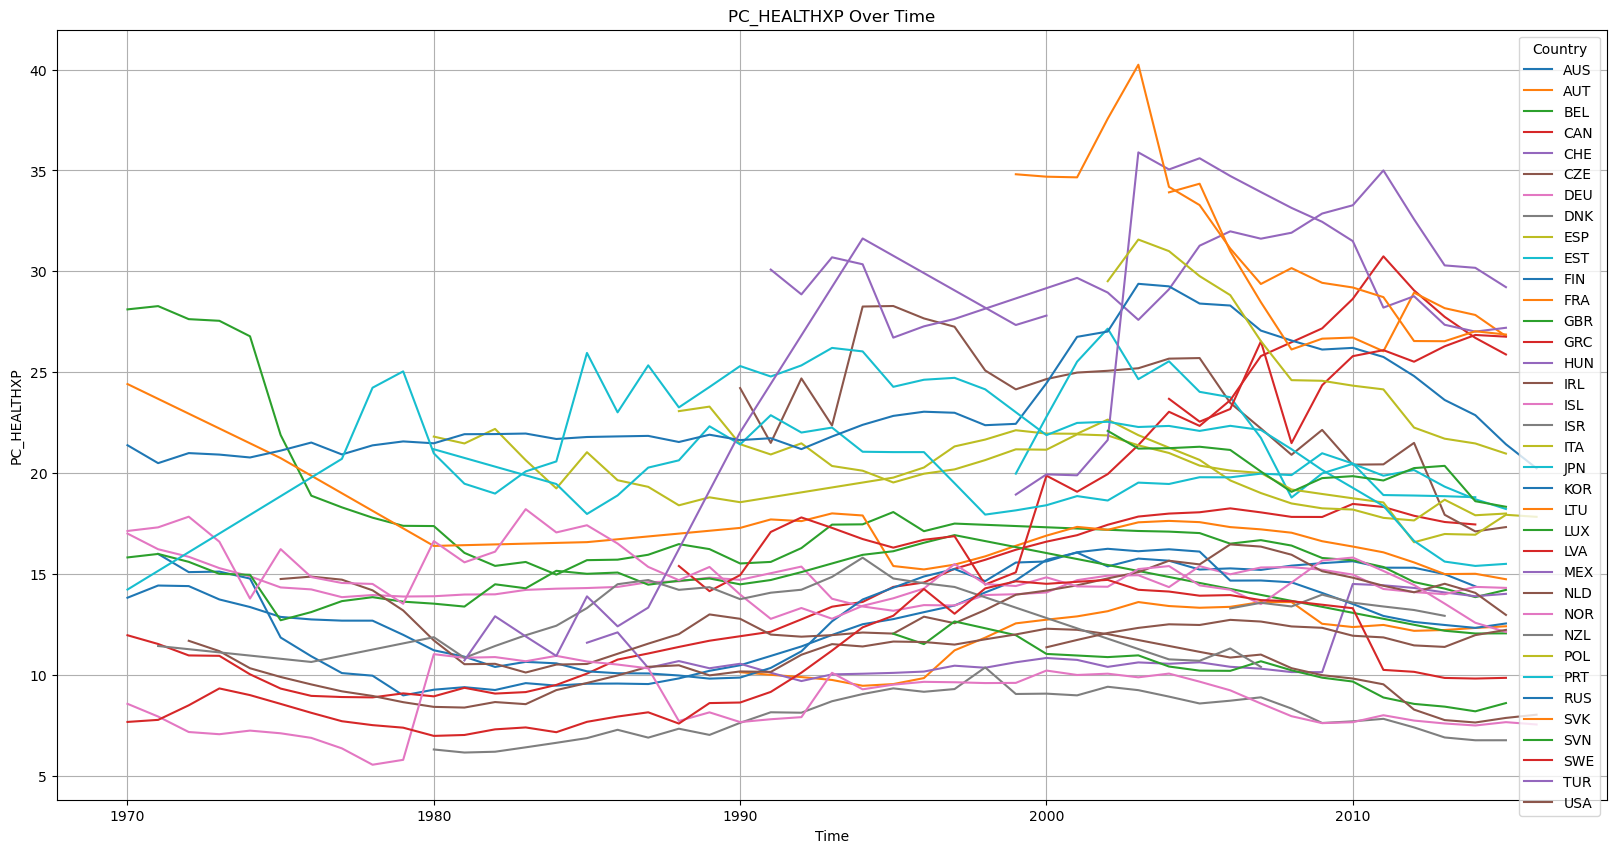

In [14]:
# Plotting PC_HEALTHEXP over TIME for every country
df_healthxp = df[['LOCATION', 'TIME', 'PC_HEALTHXP']]

plt.figure(figsize=(20, 10))

for country in df_healthxp['LOCATION'].unique():
    country_data = df_healthxp[df_healthxp['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['TIME'], country_data['PC_HEALTHXP'], label=country)

plt.title('PC_HEALTHXP Over Time')
plt.xlabel('Time')
plt.ylabel('PC_HEALTHXP')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# as expected, shows little correlation (0.25)

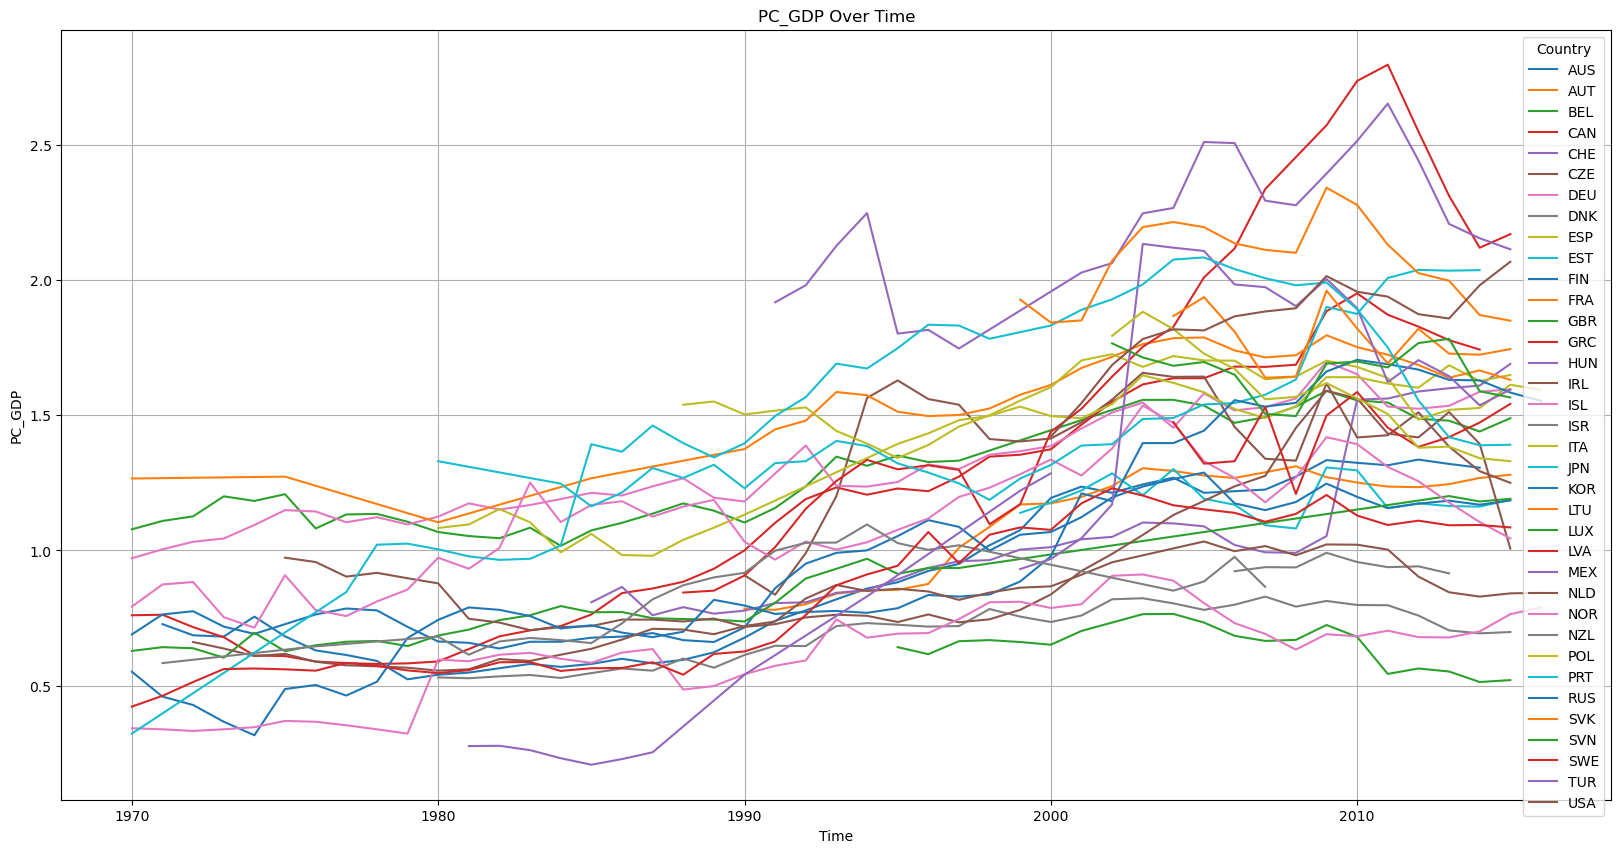

In [15]:
# Plotting PC_GDP over TIME for every country
df_pcgdp = df[['LOCATION', 'TIME', 'PC_GDP']]

plt.figure(figsize=(20, 10))

for country in df_pcgdp['LOCATION'].unique():
    country_data = df_pcgdp[df_pcgdp['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['TIME'], country_data['PC_GDP'], label=country)

plt.title('PC_GDP Over Time')
plt.xlabel('Time')
plt.ylabel('PC_GDP')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows some correlation (0.61)

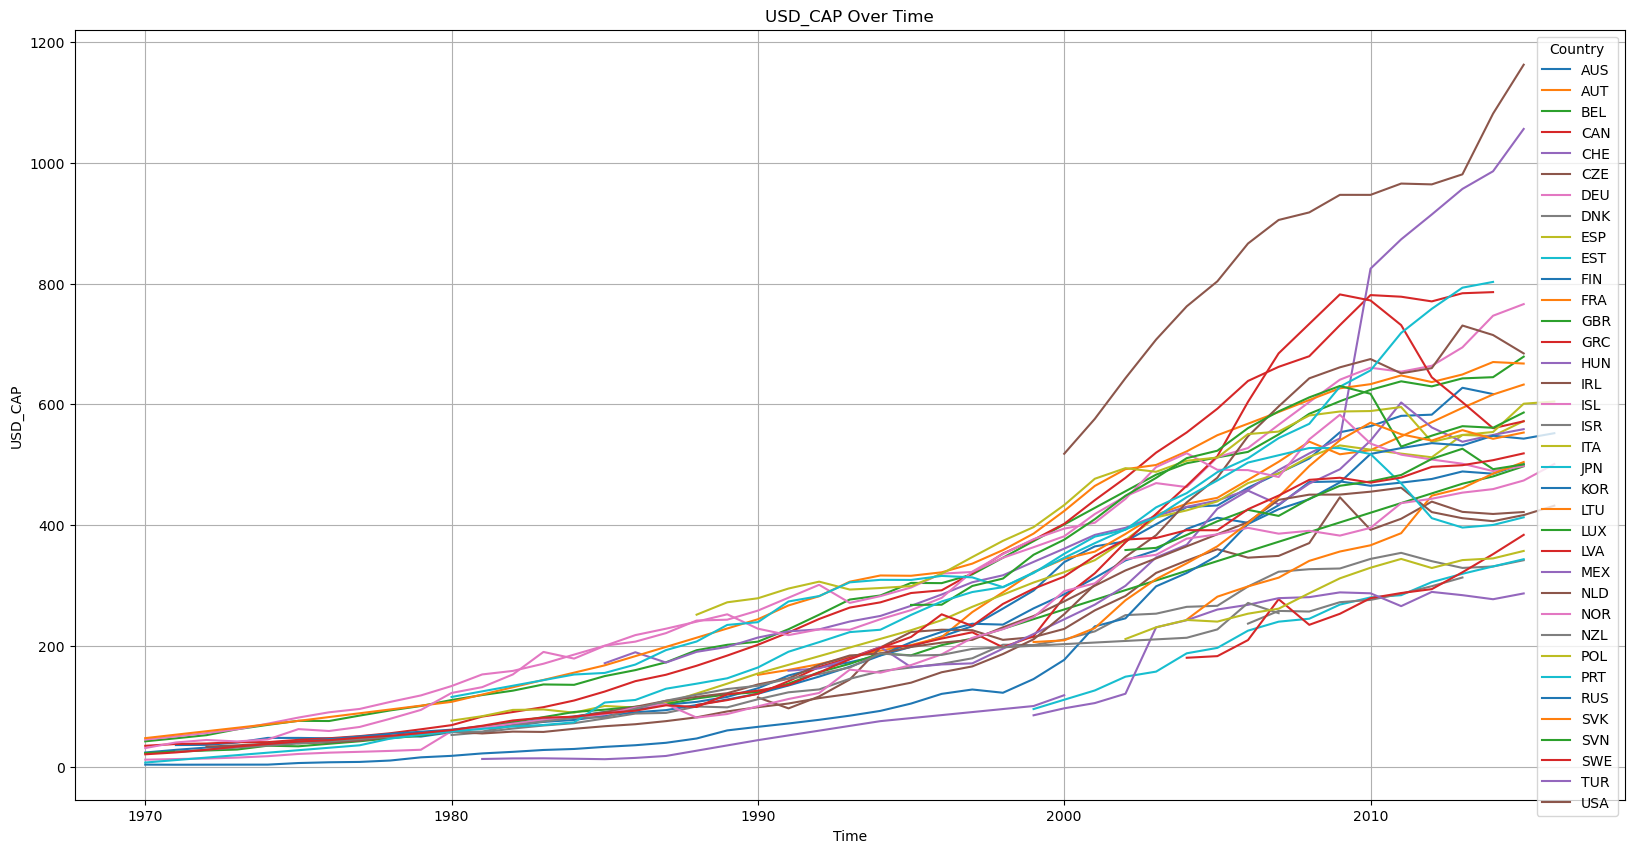

In [16]:
# Plotting USD_CAP over TIME for every country
df_usdcap = df[['LOCATION', 'TIME', 'USD_CAP']]

plt.figure(figsize=(20, 10))

for country in df_usdcap['LOCATION'].unique():
    country_data = df_usdcap[df_usdcap['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['TIME'], country_data['USD_CAP'], label=country)

plt.title('USD_CAP Over Time')
plt.xlabel('Time')
plt.ylabel('USD_CAP')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows high correlation (0.84)

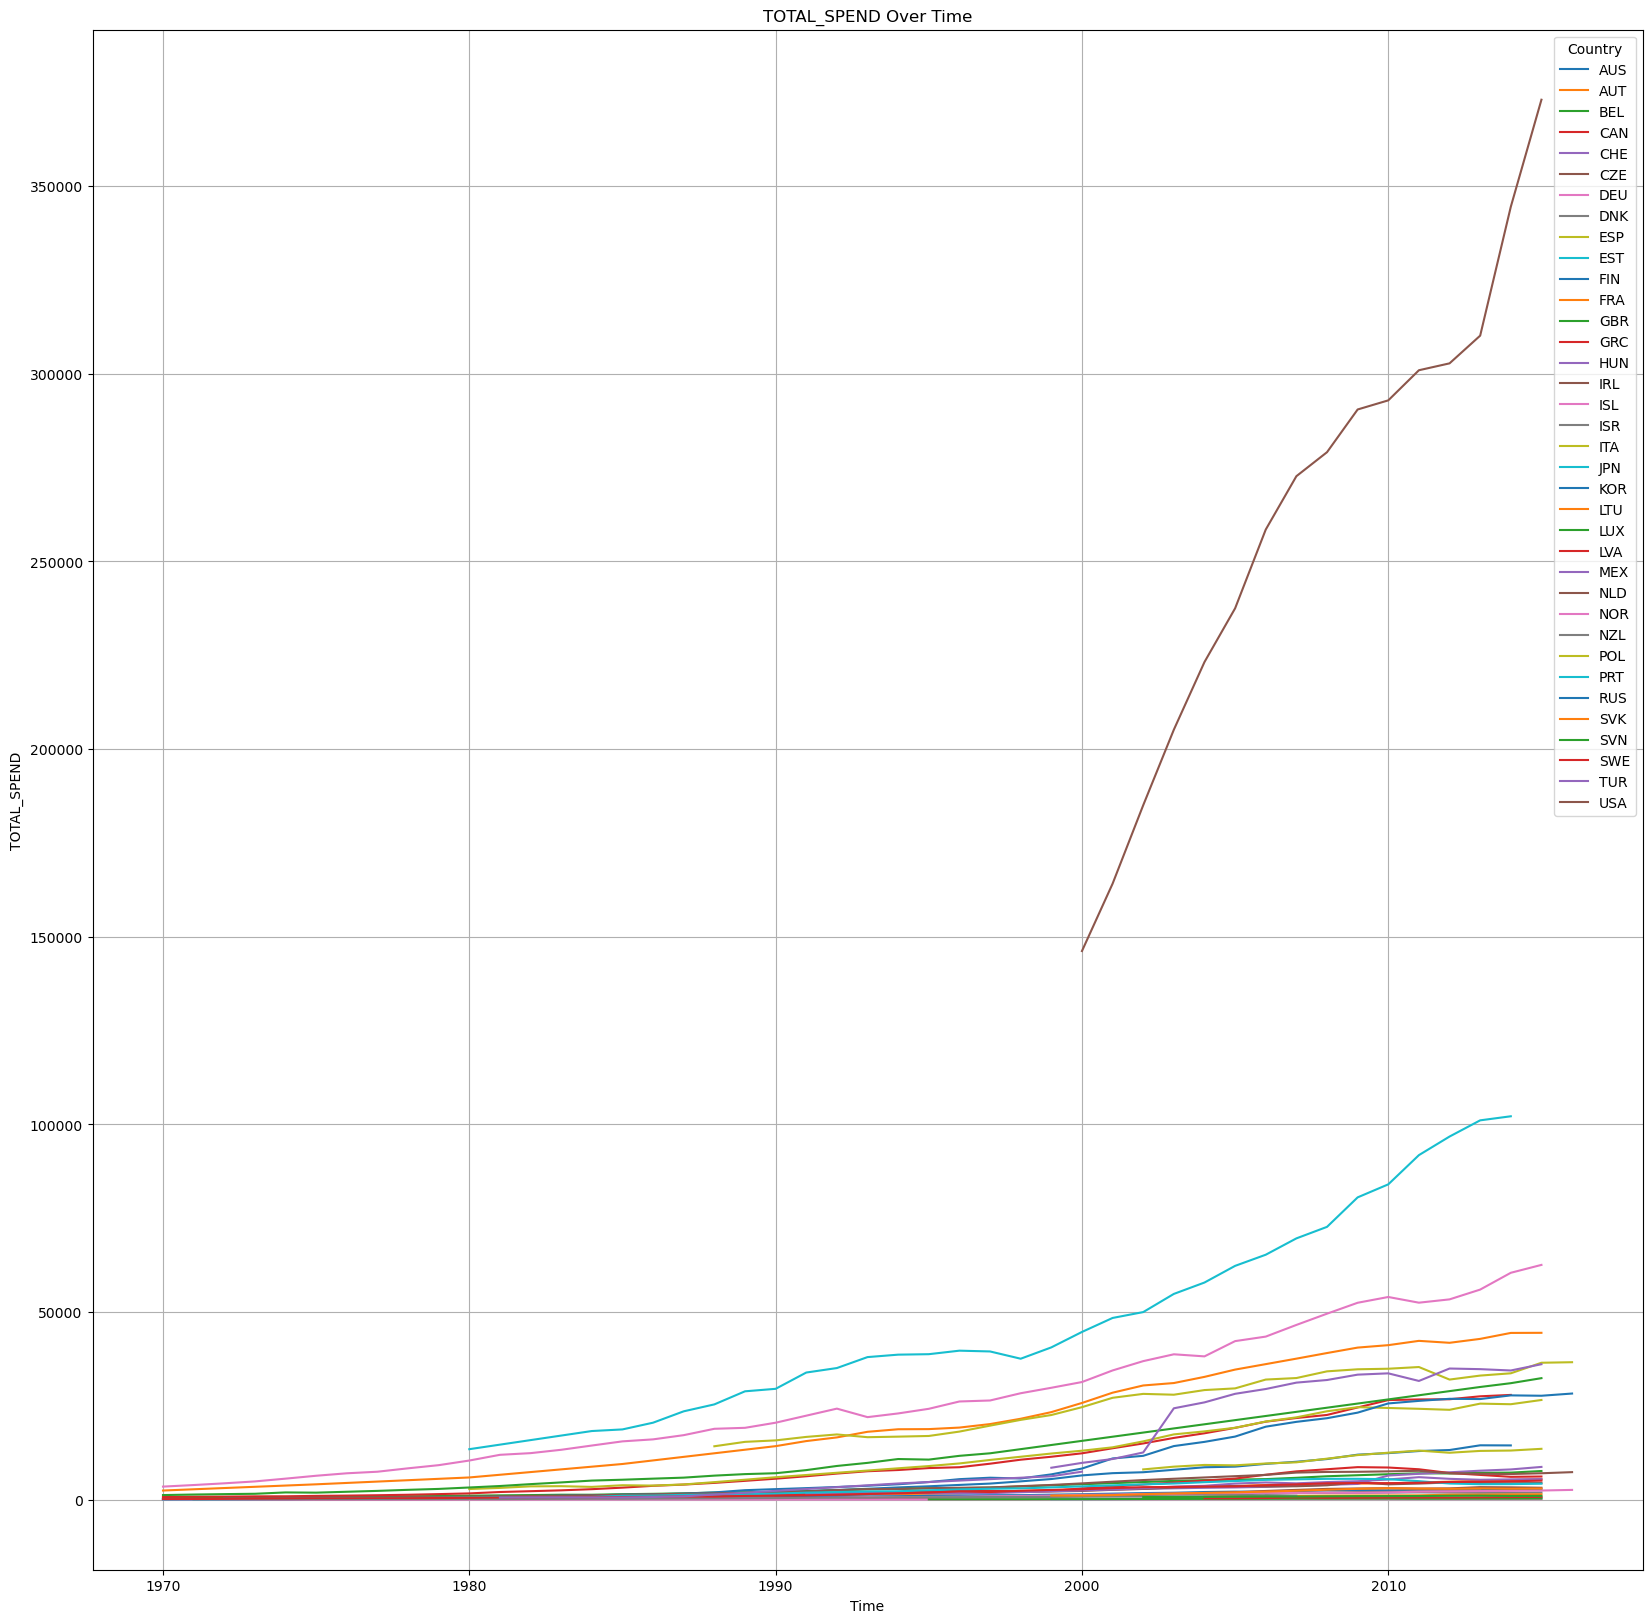

In [17]:
# Plotting TOTAL_SPEND over TIME for every country
df_tspend = df[['LOCATION', 'TIME', 'TOTAL_SPEND']]

plt.figure(figsize=(20, 20))

for country in df_tspend['LOCATION'].unique():
    country_data = df_tspend[df_tspend['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['TIME'], country_data['TOTAL_SPEND'], label=country)

plt.title('TOTAL_SPEND Over Time')
plt.xlabel('Time')
plt.ylabel('TOTAL_SPEND')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows low correlation (0.23)

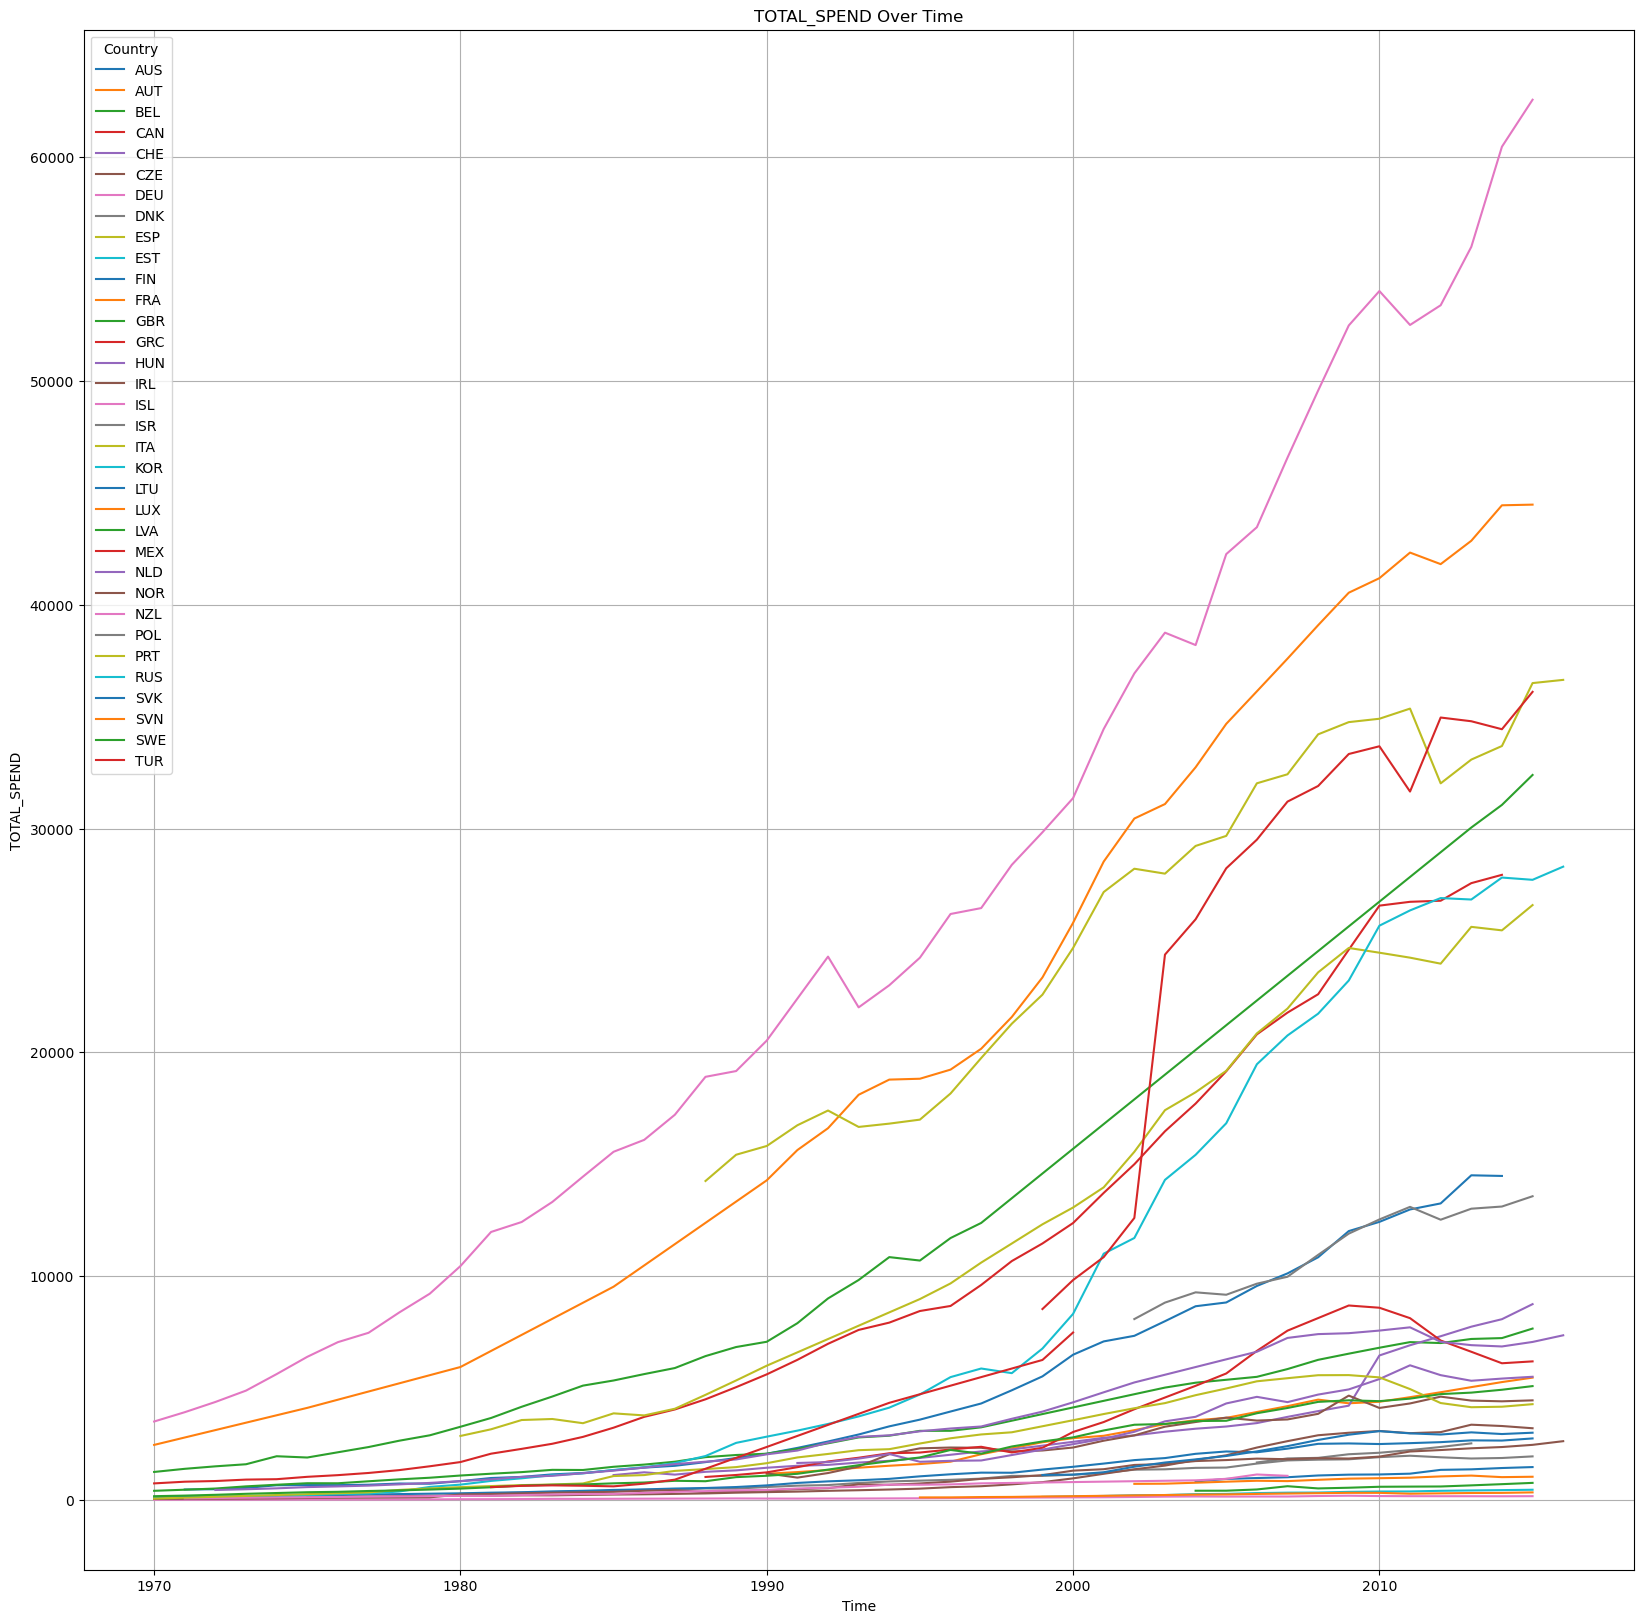

In [ ]:
# Plotting TOTAL_SPEND over TIME excluding USA and Japan for better visualization
df_tspend = df[['LOCATION', 'TIME', 'TOTAL_SPEND']]
#df_tspend = df_tspend[df_tspend['LOCATION'] != 'USA']
df_tspend = df_tspend[~df_tspend['LOCATION'].isin(['USA', 'JPN'])]

plt.figure(figsize=(20, 20))

for country in df_tspend['LOCATION'].unique():
    country_data = df_tspend[df_tspend['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['TIME'], country_data['TOTAL_SPEND'], label=country)

plt.title('TOTAL_SPEND Over Time')
plt.xlabel('Time')
plt.ylabel('TOTAL_SPEND')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# there may be some correlation that's being hidden by outliers

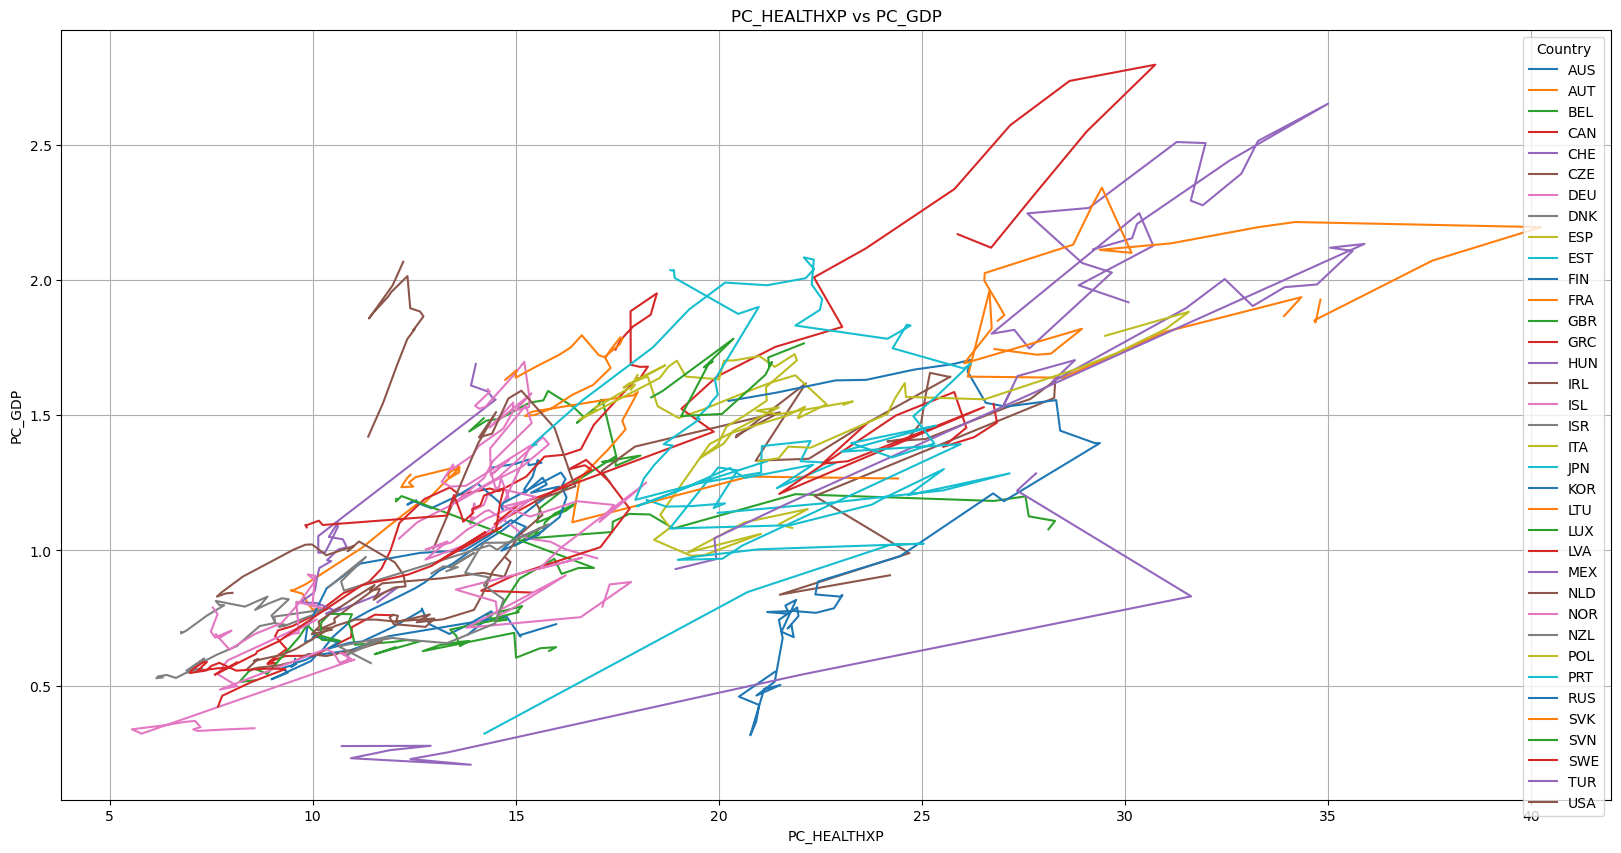

In [8]:
# Plotting PC_HEALTHXP vs PC_GDP for every country
df_XPvGDP = df[['LOCATION', 'PC_HEALTHXP', 'PC_GDP']]

plt.figure(figsize=(20, 10))

for country in df_XPvGDP['LOCATION'].unique():
    country_data = df_XPvGDP[df_XPvGDP['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['PC_HEALTHXP'], country_data['PC_GDP'], label=country)

plt.title('PC_HEALTHXP vs PC_GDP')
plt.xlabel('PC_HEALTHXP')
plt.ylabel('PC_GDP')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows correlation but visually not clear (0.72)

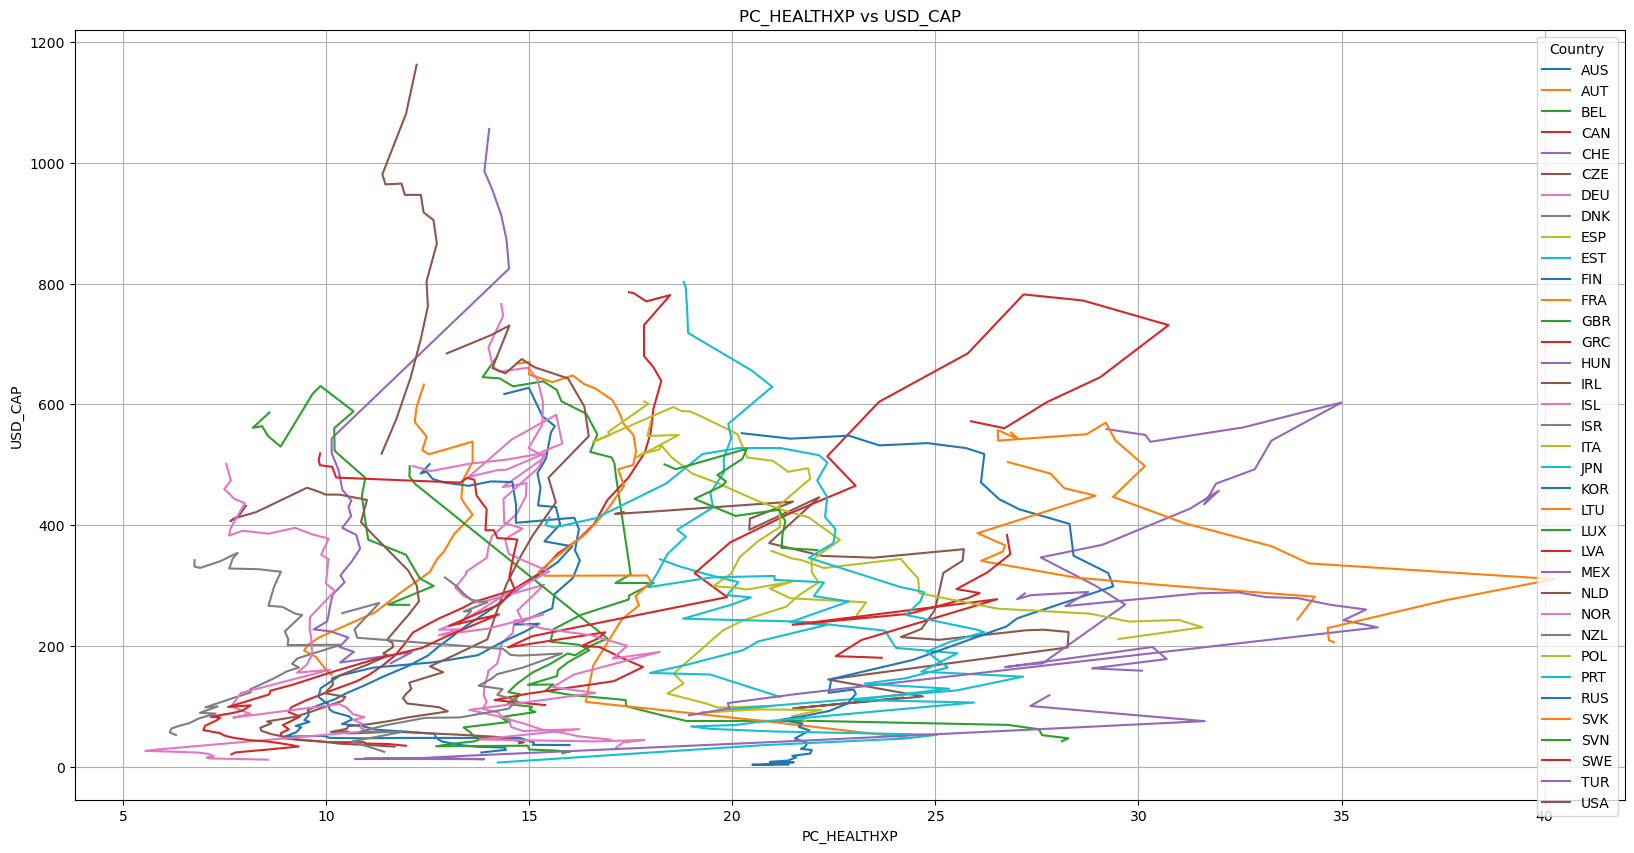

In [19]:
# Plotting PC_HEALTHXP vs USD_CAP for every country
df_XPvCAP = df[['LOCATION', 'PC_HEALTHXP', 'USD_CAP']]

plt.figure(figsize=(20, 10))

for country in df_XPvCAP['LOCATION'].unique():
    country_data = df_XPvCAP[df_XPvCAP['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['PC_HEALTHXP'], country_data['USD_CAP'], label=country)

plt.title('PC_HEALTHXP vs USD_CAP')
plt.xlabel('PC_HEALTHXP')
plt.ylabel('USD_CAP')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows no correlation (0.14)

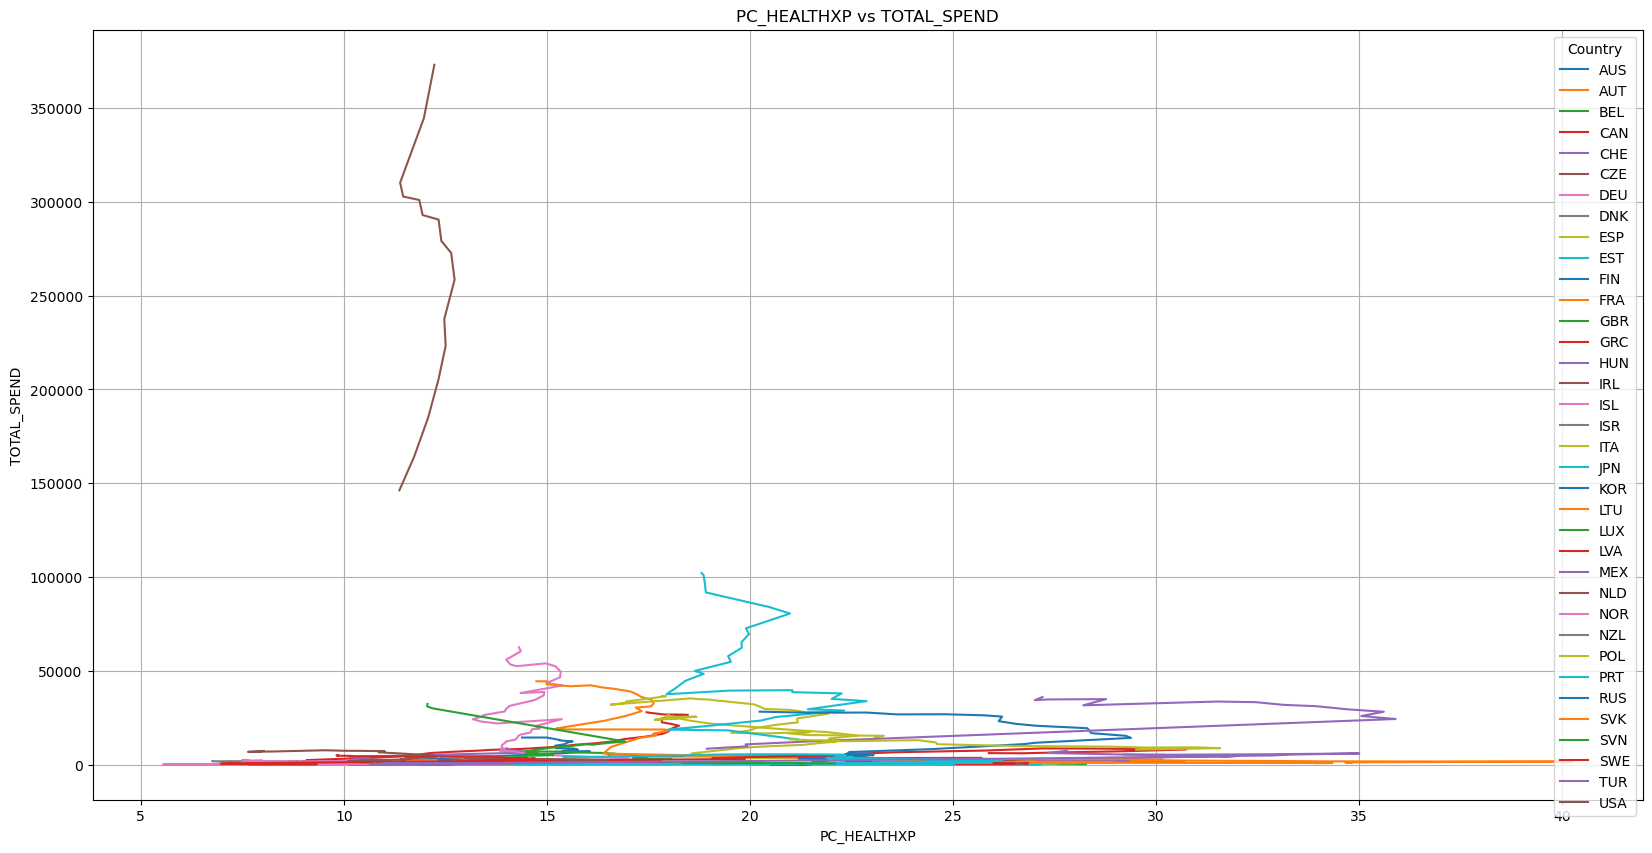

In [20]:
# Plotting PC_HEALTHXP vs TOTAL_SPEND for every country
df_XPvTS = df[['LOCATION', 'PC_HEALTHXP', 'TOTAL_SPEND']]

plt.figure(figsize=(20, 10))

for country in df_XPvTS['LOCATION'].unique():
    country_data = df_XPvTS[df_XPvTS['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['PC_HEALTHXP'], country_data['TOTAL_SPEND'], label=country)

plt.title('PC_HEALTHXP vs TOTAL_SPEND')
plt.xlabel('PC_HEALTHXP')
plt.ylabel('TOTAL_SPEND')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows no correlation (0.002)

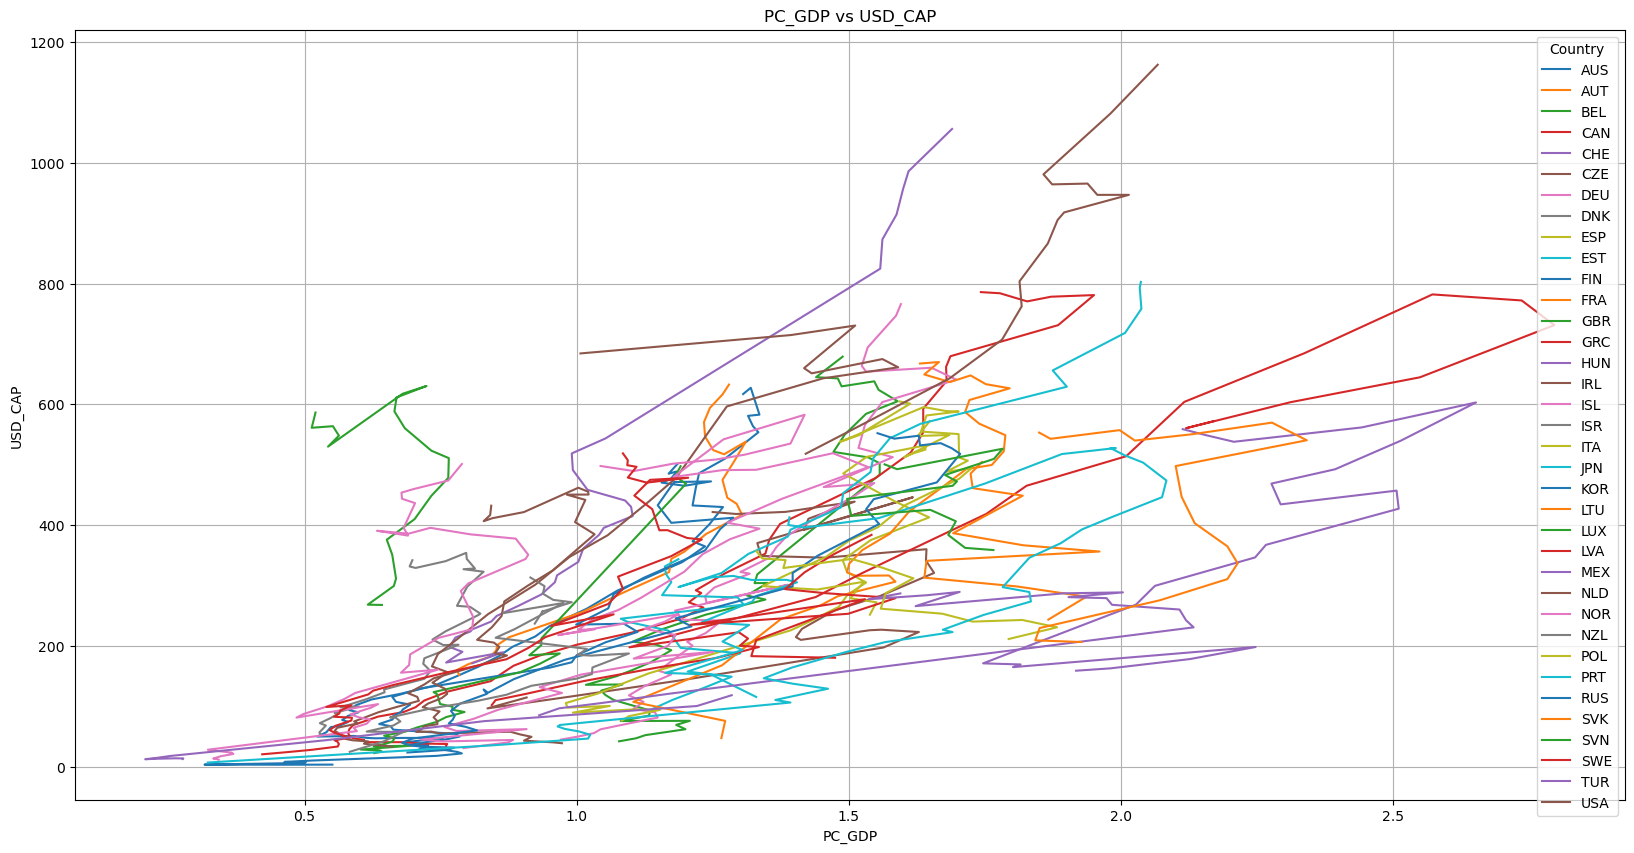

In [21]:
# Plotting PC_GDP vs USD_CAP for every country
df_GDPvCAP = df[['LOCATION', 'PC_GDP', 'USD_CAP']]

plt.figure(figsize=(20, 10))

for country in df_GDPvCAP['LOCATION'].unique():
    country_data = df_GDPvCAP[df_GDPvCAP['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['PC_GDP'], country_data['USD_CAP'], label=country)

plt.title('PC_GDP vs USD_CAP')
plt.xlabel('PC_GDP')
plt.ylabel('USD_CAP')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows correlation but visually not clear (0.67)

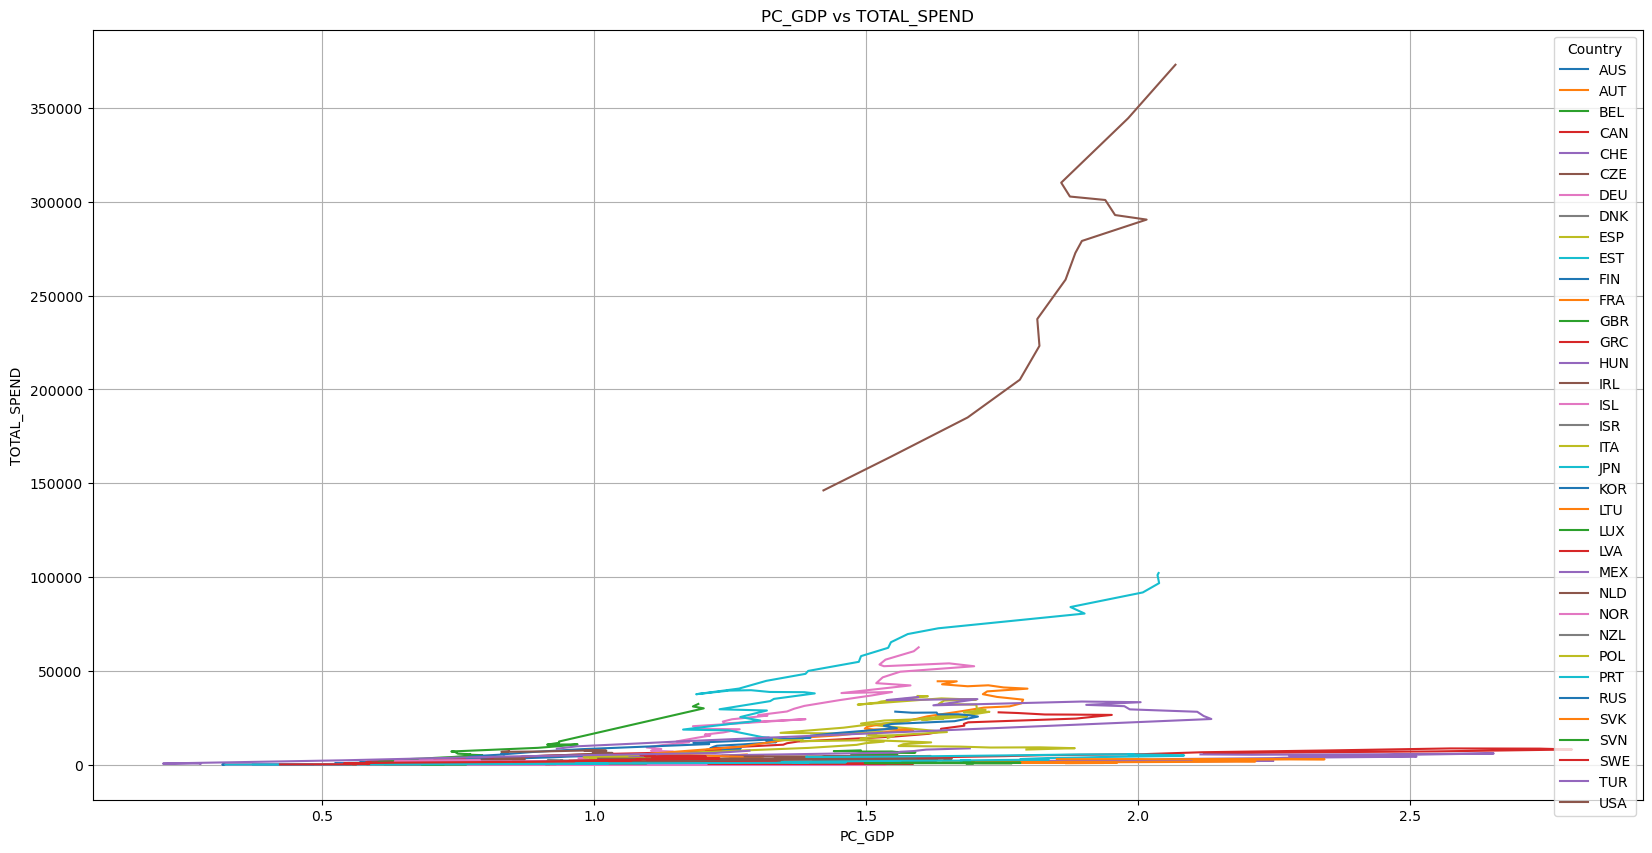

In [22]:
# Plotting PC_GDP vs TOTAL_SPEND for every country
df_GDPvTS = df[['LOCATION', 'PC_GDP', 'TOTAL_SPEND']]

plt.figure(figsize=(20,10))

for country in df_GDPvTS['LOCATION'].unique():
    country_data = df_GDPvTS[df_GDPvTS['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['PC_GDP'], country_data['TOTAL_SPEND'], label=country)

plt.title('PC_GDP vs TOTAL_SPEND')
plt.xlabel('PC_GDP')
plt.ylabel('TOTAL_SPEND')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows little correlation (0.33)

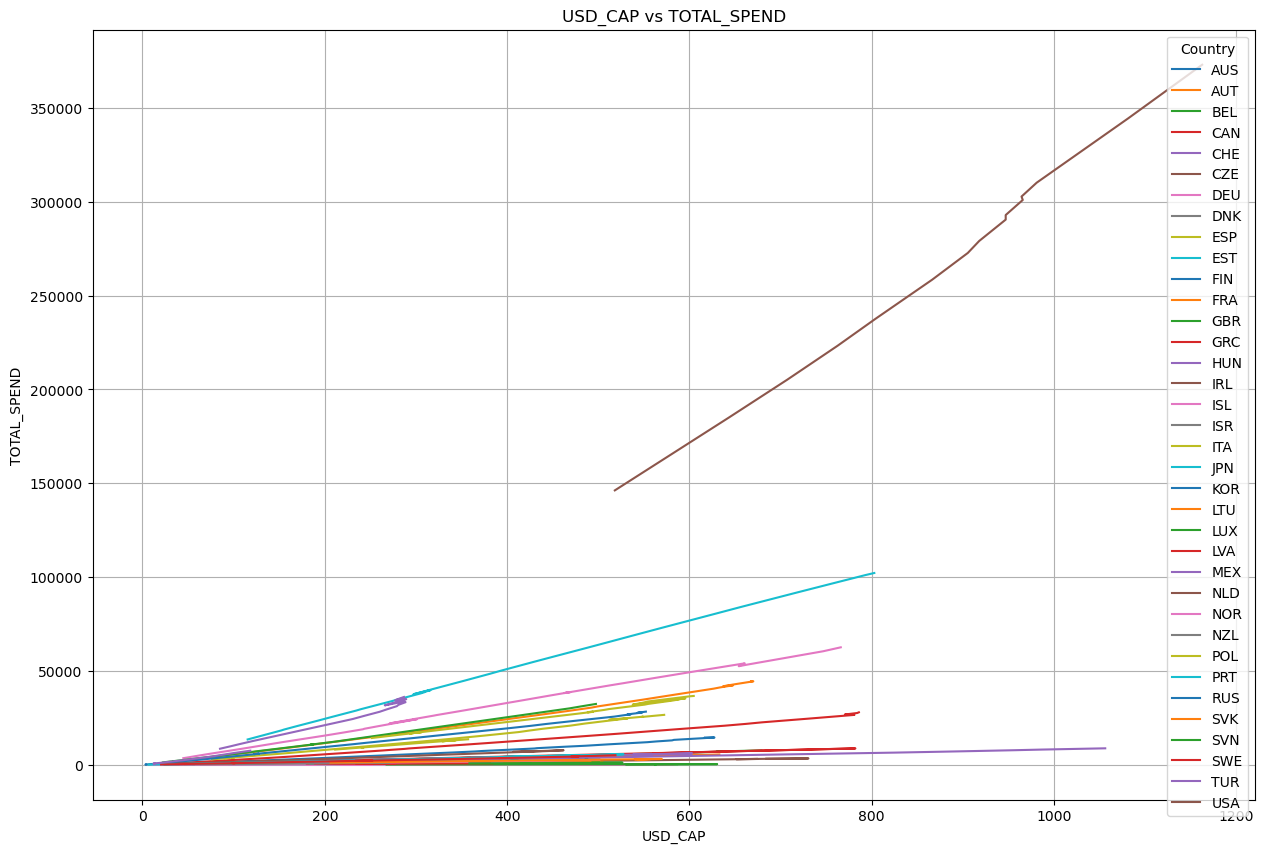

In [23]:
# Plotting USD_CAP vs TOTAL_SPEND for every country
df_CAPvTS = df[['LOCATION', 'USD_CAP', 'TOTAL_SPEND']]

plt.figure(figsize=(15, 10))

for country in df_CAPvTS['LOCATION'].unique():
    country_data = df_CAPvTS[df_CAPvTS['LOCATION'] == country]  # Filter data for the country
    plt.plot(country_data['USD_CAP'], country_data['TOTAL_SPEND'], label=country)

plt.title('USD_CAP vs TOTAL_SPEND')
plt.xlabel('USD_CAP')
plt.ylabel('TOTAL_SPEND')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# shows some correlation (0.49)

These 5 plots showed various degrees of correlation that require more analysis:
- USD_CAP vs TIME (0.84)
- PC_HEALTHXP vs PC_GDP (0.72)
- PC_GDP vs USD_CAP (0.67)
- PC_GDP vs TIME (0.61)
- USD_CAP vs TOTAL_SPEND (0.49)

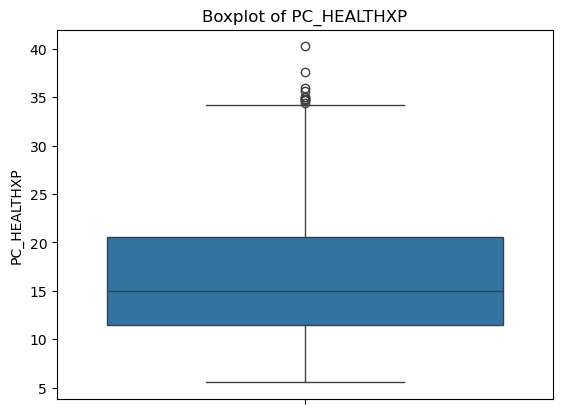

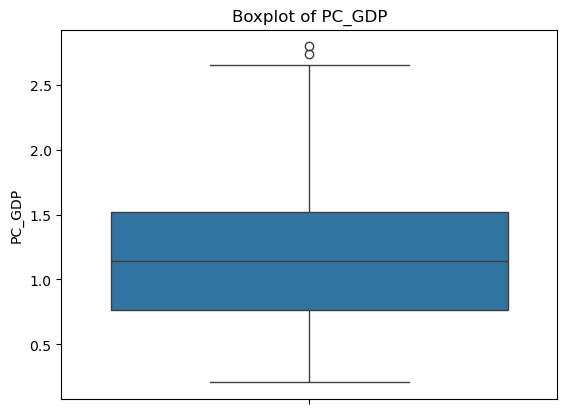

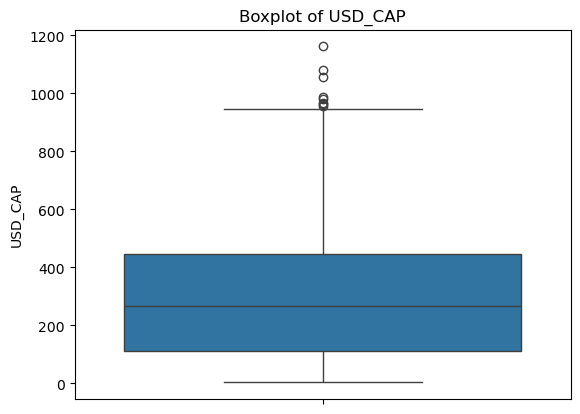

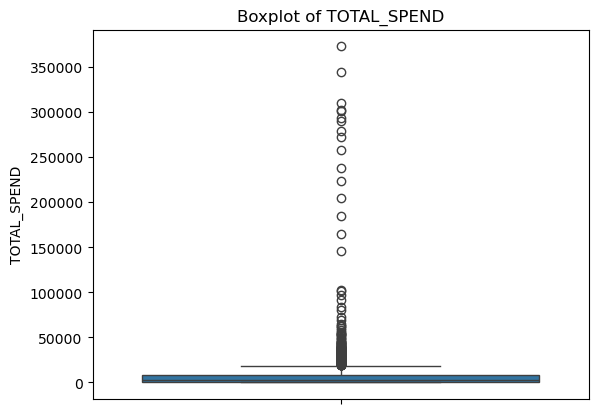

In [20]:
# visualizing outliers

import seaborn as sns

numerical_columns = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']

for column in numerical_columns:
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [15]:
# Identify potential outliers using the IQR method for each numerical column
outlier_info = {}

for column in ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_info[column] = outliers

# Display summary of outliers for each column
{col: outliers[[col, 'LOCATION', 'TIME']].head() for col, outliers in outlier_info.items()}

import pandas as pd

# Combine outlier information into a single DataFrame for each column
outlier_tables = {}

for col, outliers in outlier_info.items():
    if not outliers.empty:  # Check if there are any outliers
        outlier_tables[col] = outliers[['LOCATION', 'TIME', col]].sort_values(by=col)

# Display as individual tables for each column
for col, table in outlier_tables.items():
    print(f"\nOutliers for column: {col}")
    display(table)




Outliers for column: PC_HEALTHXP


,LOCATION,TIME,PC_HEALTHXP
703,LTU,2005,34.341
934,SVK,2001,34.657
933,SVK,2000,34.690
754,MEX,2006,34.725
932,SVK,1999,34.810
494,HUN,2011,35.001
752,MEX,2004,35.048
753,MEX,2005,35.603
751,MEX,2003,35.894
935,SVK,2002,37.564



Outliers for column: PC_GDP


,LOCATION,TIME,PC_GDP
471,GRC,2010,2.737
472,GRC,2011,2.797



Outliers for column: USD_CAP


,LOCATION,TIME,USD_CAP
184,CHE,2013,956.715
1032,USA,2012,964.237
1031,USA,2011,965.580
1033,USA,2013,980.864
185,CHE,2014,985.969
186,CHE,2015,1056.053
1034,USA,2014,1081.402
1035,USA,2015,1162.399



Outliers for column: TOTAL_SPEND


,LOCATION,TIME,TOTAL_SPEND
625,JPN,1985,18737.52
397,FRA,1994,18780.62
398,FRA,1995,18819.47
231,DEU,1988,18904.82
146,CAN,2005,19152.55
...,...,...,...
1031,USA,2011,300935.91
1032,USA,2012,302768.85
1033,USA,2013,310154.01
1034,USA,2014,344495.16


In [16]:
# Combine all outlier rows into a single DataFrame with an indicator column
all_outliers = pd.concat(
    [outliers.assign(Outlier_Column=col) for col, outliers in outlier_info.items() if not outliers.empty]
)

# Display combined table of outliers
all_outliers = all_outliers[['LOCATION', 'TIME', 'Outlier_Column'] + ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']]
all_outliers_sorted = all_outliers.sort_values(by=['Outlier_Column', 'TIME'])
display(all_outliers_sorted)

,LOCATION,TIME,Outlier_Column,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
471,GRC,2010,PC_GDP,28.633,2.737,771.997,8585.64
472,GRC,2011,PC_GDP,30.742,2.797,731.159,8119.45
932,SVK,1999,PC_HEALTHXP,34.810,1.928,206.344,1113.44
933,SVK,2000,PC_HEALTHXP,34.690,1.843,209.134,1126.96
934,SVK,2001,PC_HEALTHXP,34.657,1.851,229.487,1234.38
...,...,...,...,...,...,...,...
1033,USA,2013,USD_CAP,11.384,1.858,980.864,310154.01
185,CHE,2014,USD_CAP,13.895,1.610,985.969,8073.75
1034,USA,2014,USD_CAP,11.968,1.981,1081.402,344495.16
186,CHE,2015,USD_CAP,14.014,1.690,1056.053,8746.65


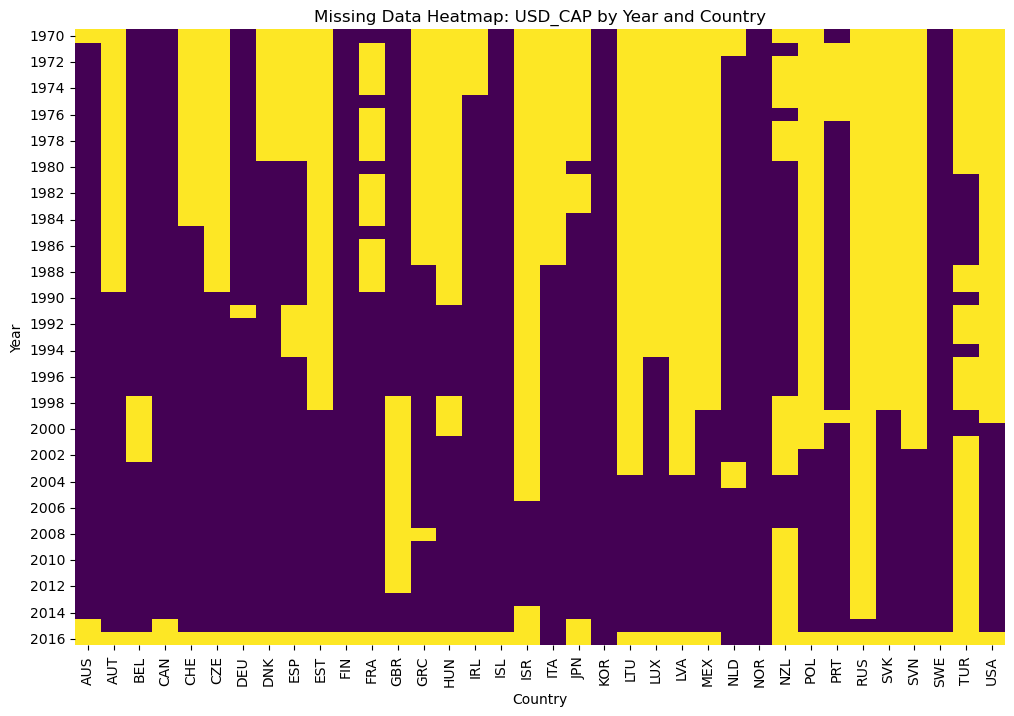

In [ ]:
# Pivot the data to explore missingness patterns across years and countries
missingness_heatmap_data = df.pivot_table(index='TIME', columns='LOCATION', values='USD_CAP')

# Visualize the missingness pattern using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missingness_heatmap_data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap: USD_CAP by Year and Country')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()

# yellow shows the missing data

In [18]:
missingness_heatmap_data

LOCATION,AUS,AUT,BEL,CAN,CHE,CZE,DEU,DNK,ESP,EST,...,NOR,NZL,POL,PRT,RUS,SVK,SVN,SWE,TUR,USA
TIME,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,41.918,34.512,NaN,NaN,44.789,NaN,NaN,NaN,...,11.514,NaN,NaN,6.784,NaN,NaN,NaN,20.418,NaN,NaN
1971,35.720,NaN,46.908,37.493,NaN,NaN,50.027,NaN,NaN,NaN,...,12.556,24.598,NaN,NaN,NaN,NaN,NaN,23.532,NaN,NaN
1972,36.056,NaN,52.105,38.279,NaN,NaN,55.594,NaN,NaN,NaN,...,13.453,NaN,NaN,NaN,NaN,NaN,NaN,27.837,NaN,NaN
1973,39.871,NaN,61.916,40.480,NaN,NaN,61.847,NaN,NaN,NaN,...,14.973,NaN,NaN,NaN,NaN,NaN,NaN,33.314,NaN,NaN
1974,47.559,NaN,69.147,40.559,NaN,NaN,71.174,NaN,NaN,NaN,...,17.281,NaN,NaN,NaN,NaN,NaN,NaN,37.473,NaN,NaN
1975,47.561,NaN,75.852,44.367,NaN,NaN,81.250,NaN,NaN,NaN,...,20.986,NaN,NaN,NaN,NaN,NaN,NaN,41.610,NaN,NaN
1976,46.908,NaN,75.524,46.967,NaN,NaN,89.973,NaN,NaN,NaN,...,23.140,41.718,NaN,NaN,NaN,NaN,NaN,43.743,NaN,NaN
1977,47.649,NaN,84.525,50.511,NaN,NaN,95.521,NaN,NaN,NaN,...,24.545,NaN,NaN,35.339,NaN,NaN,NaN,48.003,NaN,NaN
1978,50.799,NaN,93.107,55.298,NaN,NaN,107.207,NaN,NaN,NaN,...,26.049,NaN,NaN,46.422,NaN,NaN,NaN,51.130,NaN,NaN
